# 0. Presentation

### Presentation made in the framework of the Artificial Intelligence Certification in 2022
<br>
Presentation made in 4 hours for the final exam.
<br>
The information used for this analysis comes from the public Boston Crimes Database. 
<br>
The objective was to make an analysis for the Major's team. 



In [ ]:
import plotly.express as px
import datetime

# 1. Load and inspect the dataset

In [ ]:
dfp = df.copy()

In [ ]:
dfp.head()

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,SHOOTING,OCCURRED_ON_DATE,LAT,LONG,NAME,LAT_POLICE_STATION,LONG_POLICE_STATION,AVG_HAVERSINE_DISTANCE
0,I192068249,Other,0,2015-08-28 10:20:00,42.330119,-71.084251,Roxbury,42.328894,-71.085359,0.163832
1,I182074094,Violence and harassment,0,2015-09-14 09:31:00,42.315142,-71.067047,Roxbury,42.328894,-71.085359,2.145919
2,I182054888,Violence and harassment,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359,2.021175
3,I182054888,Other,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359,2.021175
4,I182054888,Other,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359,2.021175


## 1.1 Rank the number of incidents by category

In [ ]:
dfp['OCCURRED_ON_DATE'] = pd.to_datetime(dfp['OCCURRED_ON_DATE'])

In [ ]:
dfp = dfp.loc[dfp['SHOOTING']==1]

In [ ]:
dfp.duplicated().sum(), np.unique(dfp['SHOOTING'])

(377, array([1]))

In [ ]:
np.unique(dfp['OFFENSE_CODE_GROUP'])

array(['Drugs and disorderly conduct', 'Fraud and law violations',
       'Larceny and vandalism', 'Other', 'Police investigation procedure',
       'Violence and harassment'], dtype=object)

In [ ]:
pd.Series(dfp['OFFENSE_CODE_GROUP']).value_counts()

Violence and harassment           861
Police investigation procedure    262
Fraud and law violations          115
Larceny and vandalism              55
Drugs and disorderly conduct       45
Other                              17
Name: OFFENSE_CODE_GROUP, dtype: int64

In [ ]:
sht = dfp.groupby(['OFFENSE_CODE_GROUP']).count()

In [ ]:
sht = sht[['INCIDENT_NUMBER']].sort_values(by='INCIDENT_NUMBER', ascending=False)

In [ ]:
sht = sht.reset_index()

In [ ]:
sht

,OFFENSE_CODE_GROUP,INCIDENT_NUMBER
0,Violence and harassment,861
1,Police investigation procedure,262
2,Fraud and law violations,115
3,Larceny and vandalism,55
4,Drugs and disorderly conduct,45
5,Other,17


In [ ]:
dst = dfp.groupby(['NAME']).count()

## 1.2 Which district has the most incidents?

In [ ]:
dst[['INCIDENT_NUMBER']].sort_values(by='INCIDENT_NUMBER', ascending=False)

,INCIDENT_NUMBER
NAME,
Roxbury,487
Mattapan,297
Dorchester,239
Jamaica Plain,86
South End,68
South Boston,47
Hyde Park,40
Brighton,24
East Boston,23


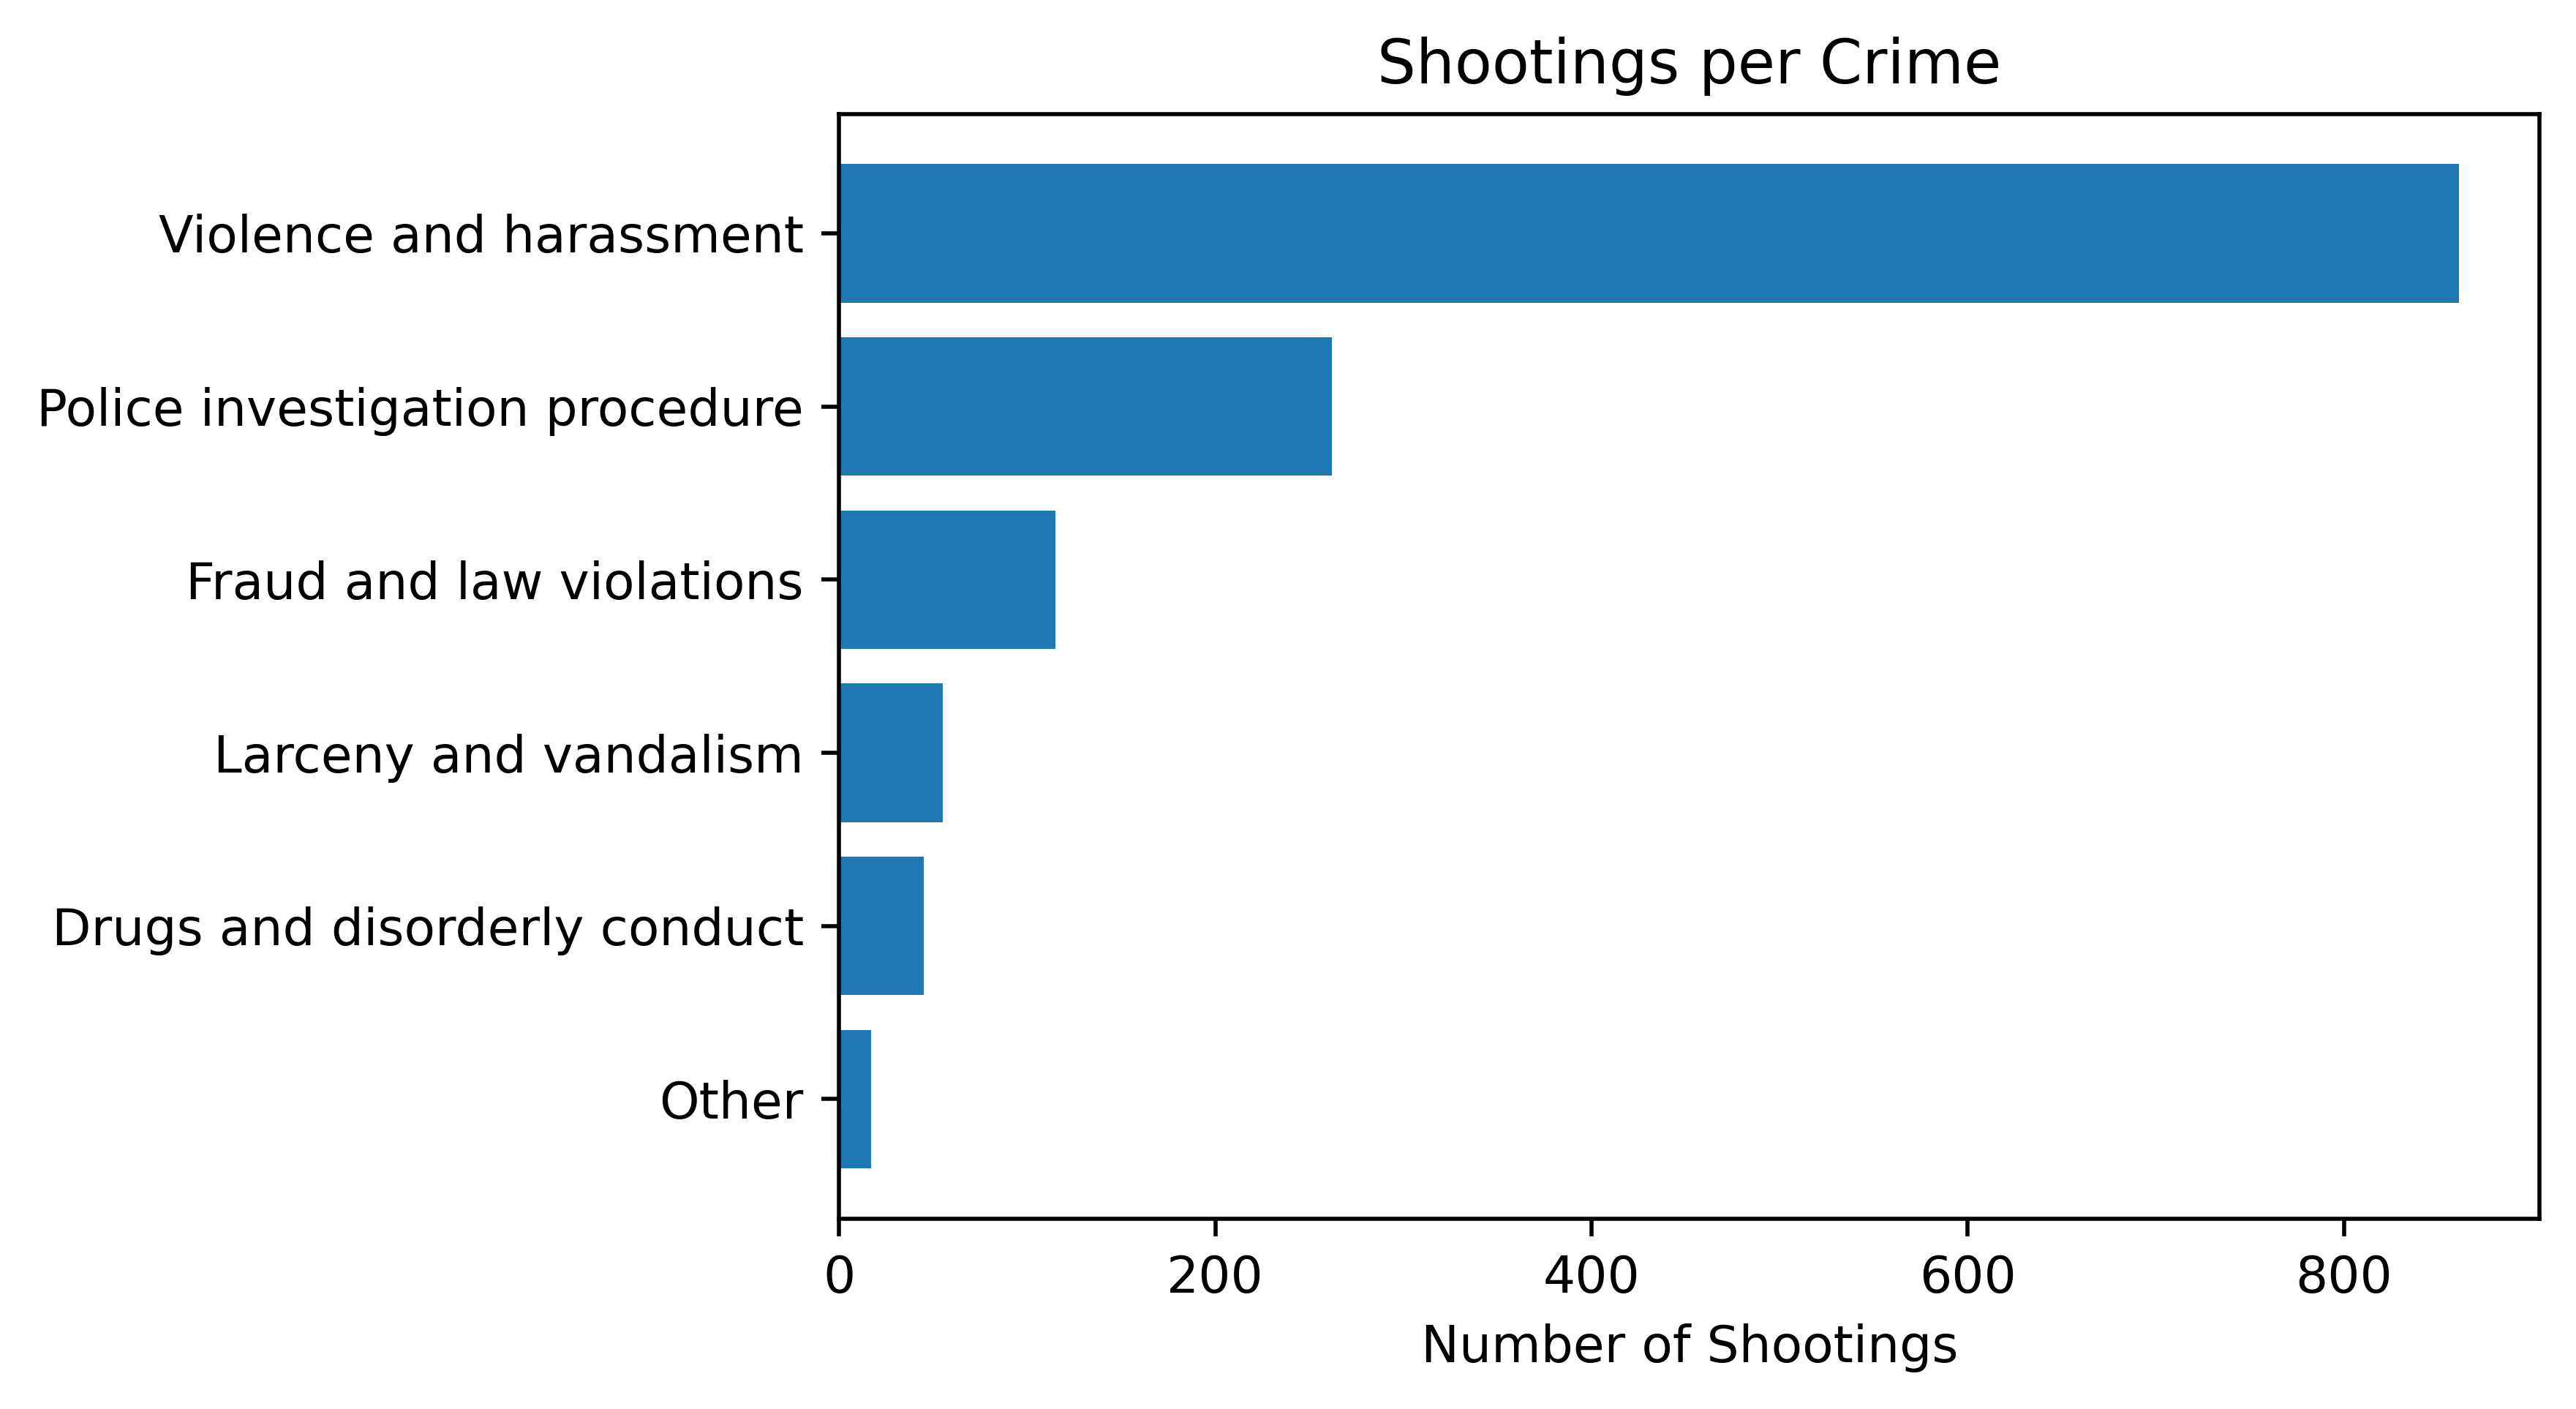

In [ ]:
y = [i for i in sht.loc[:,'OFFENSE_CODE_GROUP']]
y_pos = np.arange(len(y))
x = [i for i in sht.loc[:,'INCIDENT_NUMBER']]

fig, ax = plt.subplots()
ax.barh(y_pos, x, align='center')
ax.set_yticks(y_pos, labels=y)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of Shootings')
ax.set_title('Shootings per Crime')
fig.set_dpi(500)
plt.show()

## 1.3 Identifying the sensistive timeframes

In [ ]:
hours_df = dfp.copy()

In [ ]:
hours_df['DAY_WEEK'] = [i.day_of_week for i in hours_df['OCCURRED_ON_DATE']]
hours_df['DAY_NAME'] = [i.day_name() for i in hours_df['OCCURRED_ON_DATE']]
hours_df['HOUR'] = hours_df['OCCURRED_ON_DATE'].dt.hour

In [ ]:
hours_df.head()

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,SHOOTING,OCCURRED_ON_DATE,LAT,LONG,NAME,LAT_POLICE_STATION,LONG_POLICE_STATION,AVG_HAVERSINE_DISTANCE,DAY_WEEK,DAY_NAME,HOUR
212,I152106351,Violence and harassment,1,2015-12-25 17:27:00,42.323655,-71.085182,Roxbury,42.328894,-71.085359,0.582712,4,Friday,17
310,I152105346,Violence and harassment,1,2015-12-21 21:46:00,42.321273,-71.082875,Roxbury,42.328894,-71.085359,0.871628,0,Monday,21
413,I152104401,Police investigation procedure,1,2015-12-18 16:00:00,42.335062,-71.093168,Roxbury,42.328894,-71.085359,0.939376,4,Friday,16
414,I152104401,Violence and harassment,1,2015-12-18 16:00:00,42.335062,-71.093168,Roxbury,42.328894,-71.085359,0.939376,4,Friday,16
415,I152104401,Fraud and law violations,1,2015-12-18 16:00:00,42.335062,-71.093168,Roxbury,42.328894,-71.085359,0.939376,4,Friday,16


In [ ]:
pie_df = hours_df.groupby(by=["DAY_WEEK"], dropna=False).sum()

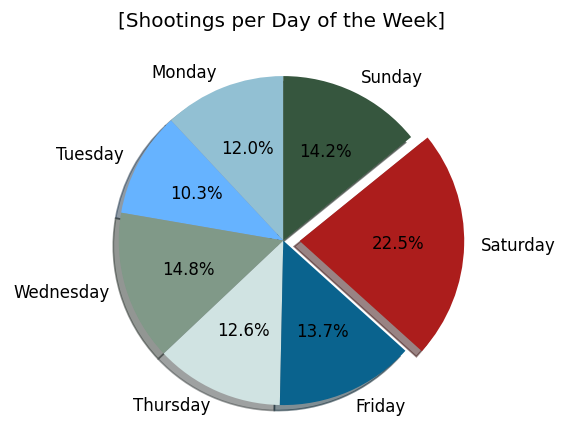

In [ ]:
EXPLODE = (0, 0, 0, 0 ,0,0.1,0)
COLORS = ['#92c0d3','#66b3ff','#809988','#d0e3e2', '#0a638e' , '#ac1d1c' , '#36563E' ]
LABELS = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']


fig1, ax1 = plt.subplots()
ax1.pie(pie_df.SHOOTING, explode=EXPLODE, shadow=True, startangle=90, labels=LABELS, autopct='%1.1f%%', colors=COLORS);
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.suptitle('[Shootings per Day of the Week]')
fig1.set_dpi(120)
plt.show()

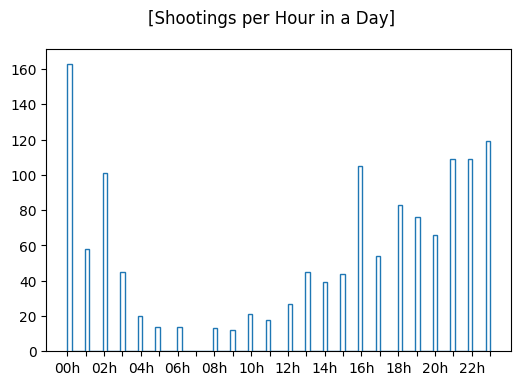

In [ ]:
xtick_labels = ['00h','' ,'02h','','04h','', '06h','' ,'08h', '','10h', '','12h', '','14h', '','16h', '','18h', '','20h', '', '22h', '']
xticks = [i for i in range(24)]

fig0, ax0 = plt.subplots()
plt.hist(hours_df['HOUR'], bins=96, histtype='step');
plt.suptitle('[Shootings per Hour in a Day]')
ax0.set_xticks(xticks)
ax0.set_xticklabels(xtick_labels)
fig0.set_dpi(100)
plt.show()

## 1.4 Identifying the Shooting situations

In [ ]:
shootings_clean = dfp.loc[dfp['OFFENSE_CODE_GROUP']=='Violence and harassment']

In [ ]:
px.scatter_geo(shootings_clean, lat='LAT', lon='LONG', color='NAME', symbol='NAME', 
               width=500, height=500, title='[Shootings in cases of Violence and Harrassment per District]', 
               color_discrete_sequence=['#fa9731','#ed2c2a','#92c0d3','#92c0d3','#92c0d3','#e06666','#92c0d3','#92c0d3','#92c0d3','#92c0d3','#ffd966','#92c0d3'])

In [ ]:
most_incident_dist.style.applymap(lambda x : 'color: red' if x != 'Larceny and vandalism' else 'color: black')

,OFFENSE_CODE_GROUP
NAME,
Brighton,Larceny and vandalism
Charlestown,Larceny and vandalism
Dorchester,Larceny and vandalism
Downtown,Larceny and vandalism
East Boston,Larceny and vandalism
Hyde Park,Larceny and vandalism
Jamaica Plain,Larceny and vandalism
Mattapan,Police investigation procedure
Roxbury,Larceny and vandalism


In [ ]:
df.groupby(['OFFENSE_CODE_GROUP']).count()

,INCIDENT_NUMBER,SHOOTING,OCCURRED_ON_DATE,LAT,LONG,NAME,LAT_POLICE_STATION,LONG_POLICE_STATION,AVG_HAVERSINE_DISTANCE
OFFENSE_CODE_GROUP,,,,,,,,,
Disputes,15415,15415,15415,15415,15415,15415,15415,15415,15415
Drugs and disorderly conduct,19011,19011,19011,19011,19011,19011,19011,19011,19011
Fraud and law violations,26781,26781,26781,26781,26781,26781,26781,26781,26781
Larceny and vandalism,76001,76001,76001,76001,76001,76001,76001,76001,76001
Other,19385,19385,19385,19385,19385,19385,19385,19385,19385
Police investigation procedure,50483,50483,50483,50483,50483,50483,50483,50483,50483
Violence and harassment,29989,29989,29989,29989,29989,29989,29989,29989,29989


In [ ]:
df_total = df.groupby(['OFFENSE_CODE_GROUP']).count()

In [ ]:
aa = df_total[['INCIDENT_NUMBER']].sort_values(by='INCIDENT_NUMBER', ascending=False)

In [ ]:
aa.head()

,INCIDENT_NUMBER
OFFENSE_CODE_GROUP,
Larceny and vandalism,76001
Police investigation procedure,50483
Violence and harassment,29989
Fraud and law violations,26781
Other,19385


In [ ]:
aa = aa.reset_index()

In [ ]:
l = [i for i in aa.loc[:,'INCIDENT_NUMBER']]
l

[76001, 50483, 29989, 26781, 19385, 19011, 15415]

In [ ]:
o = [i for i in aa.loc[:,'OFFENSE_CODE_GROUP']]
o

['Larceny and vandalism',
 'Police investigation procedure',
 'Violence and harassment',
 'Fraud and law violations',
 'Other',
 'Drugs and disorderly conduct',
 'Disputes']

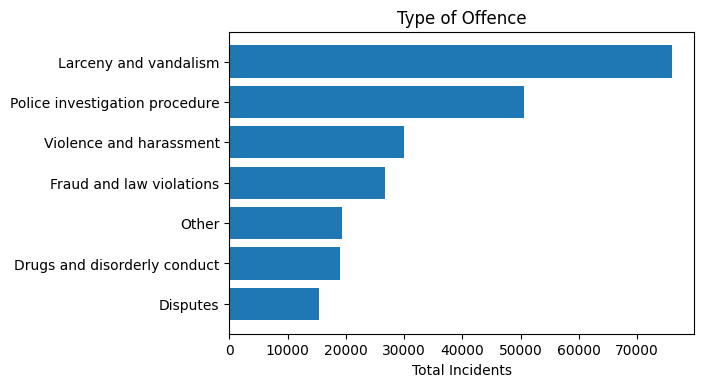

In [ ]:
fig3, ax3 = plt.subplots()
plt.barh(np.arange(len(o)), l, align='center')
ax3.invert_yaxis()  # labels read top-to-bottom
ax3.set_yticks(np.arange(len(o)),labels=o)
ax3.set_xlabel('Total Incidents')
ax3.set_title('Type of Offence')
fig3.set_dpi(100)
plt.show() 